In [1]:
import sympy as sy
from sympy.physics.vector import ReferenceFrame,dynamicsymbols
from sympy.physics.mechanics import inertia
from sympy.physics.vector.printing import vpprint,vlatex

import IPython
from IPython.display import display

import matplotlib.pyplot as plt

import numpy as np

from scipy.integrate import odeint

def displayH(a1,a2='', a3='', a4='', a5='', a6='', a7='',):
    latex_a1 = sy.latex(a1)
    latex_a2 = sy.latex(a2)
    latex_a3 = sy.latex(a3)
    latex_a4 = sy.latex(a4)
    latex_a5 = sy.latex(a5)
    latex_a6 = sy.latex(a6)
    latex_a7 = sy.latex(a7)
    display( IPython.core.display.Math(latex_a1 + latex_a2 + latex_a3 + latex_a4 + latex_a5 + latex_a6 + latex_a7)  )

## (1) Dual spin spacecraft.

In class, we derived the linear stability conditions for a dual-spin spacecraft where the constant fly-wheel spin axis was aligned with $\hat{b}_1$. For this homework problem, re-derive the linear stability conditions for the case when the fly-wheel spin axis is aligned with the third body axis, $\hat{b}_3$.

Using the following equilibrium points:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Using the following equilibrium points:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Using the following equilibrium points:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Stability Equations


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

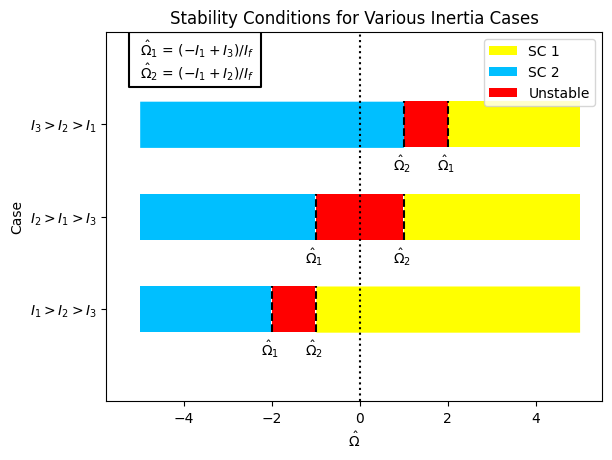

In [311]:
t = sy.Symbol("t")

B = ReferenceFrame("B")

I1 = sy.Symbol("I_1")
I2 = sy.Symbol("I_2")
I3 = sy.Symbol("I_3")

I = inertia(ixx=I1,iyy=I2,izz=I3,frame=B)

If = inertia(ixx=sy.Symbol("I_f"),iyy=0,izz=0,frame=B)
wf = sy.Symbol("Omega")*B.x

# If = inertia(ixx=0,iyy=sy.Symbol("I_f"),izz=0,frame=B)
# wf = sy.Symbol("Omega")*B.y

# If = inertia(ixx=0,iyy=0,izz=sy.Symbol("I_f"),frame=B)
# wf = sy.Symbol("Omega")*B.z

w1 = dynamicsymbols("omega_1")
w2 = dynamicsymbols("omega_2")
w3 = dynamicsymbols("omega_3")

wb = w1*B.x+w2*B.y+w3*B.z

H = I.dot(wb)+If.dot(wf)
H_dot = sy.diff(H,t,B)+wb.cross(H)

omega_dot = sy.solve(H_dot.to_matrix(B),[sy.diff(w1),sy.diff(w2),sy.diff(w3)])

omega_dot_vector = 0
for key,direction in zip(omega_dot,[B.x,B.y,B.z]):
    omega_dot_vector += omega_dot[key]*direction

omega_eq = sy.solve(omega_dot_vector.to_matrix(B),[w1,w2,w3])

delta_omega = dynamicsymbols(r"\delta\omega_1")*B.x+dynamicsymbols(r"\delta\omega_2")*B.y+dynamicsymbols(r"\delta\omega_3")*B.z

for sol in omega_eq:
    print("Using the following equilibrium points:")
    displayH(sy.Symbol(r"\omega="),sy.Matrix(sol))

    omega = (sol[0]*B.x+sol[1]*B.y+sol[2]*B.z+delta_omega).to_matrix(B)
    eq = omega_dot_vector.subs(w1,omega[0]).subs(w2,omega[1]).subs(w3,omega[2])
    eq = eq.to_matrix(B).expand()

    # Ignoring delta product terms
    for s1 in [dynamicsymbols(r"\delta\omega_1"),dynamicsymbols(r"\delta\omega_2"),dynamicsymbols(r"\delta\omega_3")]:
        for s2 in [dynamicsymbols(r"\delta\omega_1"),dynamicsymbols(r"\delta\omega_2"),dynamicsymbols(r"\delta\omega_3")]:
            eq = eq.subs(s1*s2,0)

    stable_system = 0
    for piece,direction in zip(eq,[B.x,B.y,B.z]):
        stable_system+=piece*direction
    stable_system_dot = sy.diff(stable_system,t,B)
    stable_system_dot = stable_system_dot.subs(sy.diff(w1),0).subs(sy.diff(w2),0).subs(sy.diff(w3),0)
    
    for w,piece in zip([dynamicsymbols(r"\delta\omega_1"),dynamicsymbols(r"\delta\omega_2"),dynamicsymbols(r"\delta\omega_3")],eq):
        stable_system_dot = stable_system_dot.subs(sy.diff(w),piece)

    for i in sol:
        for o in [w1,w2,w3]:
            if i == o:
                displayH("Normalizing by:  ",i)
                displayH(sy.Symbol(r"\hat{\Omega} ="),sy.Symbol(r"\Omega")/i)
                stable_system = stable_system.subs(sy.Symbol("Omega"),sy.Symbol(r"\hat{\Omega}")*i)
                stable_system_dot = stable_system_dot.subs(sy.Symbol("Omega"),sy.Symbol(r"\hat{\Omega}")*i)
                break

    stable_system = stable_system.simplify()
    stable_system_dot = stable_system_dot.simplify()

    displayH(sy.Symbol(r"\delta\dot{\omega}="),stable_system.to_matrix(B))
    displayH(sy.Symbol(r"\delta\ddot{\omega}="),stable_system_dot.to_matrix(B))

    if np.count_nonzero(sol) == 1:
        print("Stability Equations")
        for line in stable_system_dot.to_matrix(B):
            for s in [dynamicsymbols(r"\delta\omega_1"),dynamicsymbols(r"\delta\omega_2"),dynamicsymbols(r"\delta\omega_3")]:
                val = line.coeff(s)
                if val != 0:
                    displayH(sy.Symbol(vlatex(sy.diff(sy.diff(s)))),"=",sy.Symbol("k"),sy.Symbol(vlatex(s)),sy.Symbol(r"\rightarrow k="),val,sy.Symbol(">0"))
                    break
            else:
                continue
            break
        o2,o1 = sy.solve(val,sy.Symbol(r"\hat{\Omega}"))
        displayH(sy.Symbol(r"\hat{\Omega}_1 ="),o1)
        displayH(sy.Symbol(r"\hat{\Omega}_2 ="),o2)

        plt.figure()
        s1 = float(o1.subs(I1,3).subs(I2,2).subs(I3,1).subs(sy.Symbol("I_f"),1))
        s2 = float(o2.subs(I1,3).subs(I2,2).subs(I3,1).subs(sy.Symbol("I_f"),1))

        plt.plot(2*[s1],[.75,1.25],color="black",linestyle="dashed")
        plt.plot(2*[s2],[.75,1.25],color="black",linestyle="dashed")
        plt.annotate(r"$\hat{\Omega}_1$",(s1-0.25,0.5))
        plt.annotate(r"$\hat{\Omega}_2$",(s2-0.25,0.5))
        w = np.linspace(-5,5,1000)
        
        # SC 1
        sc1 = np.array([o > s1 and o > s2 for o in w])
        plt.fill_between(w[sc1],y1=len(w[sc1])*[0.75],y2=len(w[sc1])*[1.25],color="yellow",label="SC 1",linewidth=0)
        # SC 2
        sc2 = np.array([o < s1 and o < s2 for o in w])
        plt.fill_between(w[sc2],y1=len(w[sc2])*[0.75],y2=len(w[sc2])*[1.25],color="deepskyblue",label="SC 2",linewidth=0)
        # Unstable
        unstable = ~(sc1|sc2)
        plt.fill_between(w[unstable],y1=len(w[unstable])*[0.75],y2=len(w[unstable])*[1.25],color="red",label="Unstable",linewidth=0)

        s1 = float(o1.subs(I1,2).subs(I2,3).subs(I3,1).subs(sy.Symbol("I_f"),1))
        s2 = float(o2.subs(I1,2).subs(I2,3).subs(I3,1).subs(sy.Symbol("I_f"),1))

        plt.plot(2*[s1],[1.75,2.25],color="black",linestyle="dashed")
        plt.plot(2*[s2],[1.75,2.25],color="black",linestyle="dashed")
        plt.annotate(r"$\hat{\Omega}_1$",(s1-0.25,1.5))
        plt.annotate(r"$\hat{\Omega}_2$",(s2-0.25,1.5))
        
        # SC 1
        sc1 = np.array([o > s1 and o > s2 for o in w])
        plt.fill_between(w[sc1],y1=len(w[sc1])*[1.75],y2=len(w[sc1])*[2.25],color="yellow",linewidth=0)
        # SC 2
        sc2 = np.array([o < s1 and o < s2 for o in w])
        plt.fill_between(w[sc2],y1=len(w[sc2])*[1.75],y2=len(w[sc2])*[2.25],color="deepskyblue",linewidth=0)
        # Unstable
        unstable = ~(sc1|sc2)
        plt.fill_between(w[unstable],y1=len(w[unstable])*[1.75],y2=len(w[unstable])*[2.25],color="red",linewidth=0)

        s1 = float(o1.subs(I1,1).subs(I2,2).subs(I3,3).subs(sy.Symbol("I_f"),1))
        s2 = float(o2.subs(I1,1).subs(I2,2).subs(I3,3).subs(sy.Symbol("I_f"),1))

        plt.plot(2*[s1],[2.75,3.25],color="black",linestyle="dashed")
        plt.plot(2*[s2],[2.75,3.25],color="black",linestyle="dashed")
        plt.annotate(r"$\hat{\Omega}_1$",(s1-0.25,2.5))
        plt.annotate(r"$\hat{\Omega}_2$",(s2-0.25,2.5))

        # SC 1
        sc1 = np.array([o > s1 and o > s2 for o in w])
        plt.fill_between(w[sc1],y1=len(w[sc1])*[2.75],y2=len(w[sc1])*[3.25],color="yellow",linewidth=0)
        # SC 2
        sc2 = np.array([o < s1 and o < s2 for o in w])
        plt.fill_between(w[sc2],y1=len(w[sc2])*[2.75],y2=len(w[sc2])*[3.25],color="deepskyblue",linewidth=0)
        # Unstable
        unstable = ~(sc1|sc2)
        plt.fill_between(w[unstable],y1=len(w[unstable])*[2.75],y2=len(w[unstable])*[3.25],color="red",linewidth=0)

        plt.axvline(x=0,linestyle="dotted",color="black")

        plt.title("Stability Conditions for Various Inertia Cases")
        plt.annotate(f"{r"$\hat{\Omega}_1$"} = ${o1}$",(-5,3.75))
        plt.annotate(f"{r"$\hat{\Omega}_2$"} = ${o2}$",(-5,3.5))
        plt.plot([-2.25,-5.25,-5.25,-2.25,-2.25],[4,4,3.4,3.4,4],color="black")
        plt.yticks([1,2,3],[r"$I_1>I_2>I_3$",r"$I_2>I_1>I_3$",r"$I_3>I_2>I_1$"])
        plt.ylim([0,4])
        plt.ylabel("Case")
        # plt.xticks([0])
        plt.xlabel(r"$\hat{\Omega}$")
        plt.legend()
        plt.show()

$\newline$

## (3) Gravity-gradient stability simulation.
The linearized equations of motion for the gravity-gradient satellite derived in class
are as follows:

$$
\ddot{\theta} + 3n^2 \left( \frac{I_1 - I_3}{I_2} \right) \theta = 0 
\quad \text{...for the pitch angle}
$$

$$
\begin{pmatrix}
\dot{\phi} \\
\dot{\psi}
\end{pmatrix}
+ 
\begin{bmatrix}
0 & 0 \\
n(k_R - 1) & n(1 - k_Y)
\end{bmatrix}
\begin{pmatrix}
\phi \\
\psi
\end{pmatrix}
+
\begin{bmatrix}
4n^2 k_Y & 0 \\
0 & n^2 k_R
\end{bmatrix}
\begin{pmatrix}
\phi \\
\psi
\end{pmatrix}
= 
\begin{pmatrix}
0 \\
0
\end{pmatrix}
\quad \text{...for the roll-yaw angles}
$$

where,

$$
k_R = \frac{I_2 - I_1}{I_3}, \quad
k_Y = \frac{I_2 - I_3}{I_1}, \quad
n = \text{mean motion}
$$

A satellite is in a 7000 km circular orbit around the Earth ($\mu = 398600.4418 \, \text{km}^3/\text{s}^2$).The initial conditions for the Euler angles and the Euler angle rates are:

$(\phi_0, \theta_0, \psi_0) = (30^\circ, 20^\circ, 10^\circ) \quad \text{and} \quad (\dot{\phi}_0, \dot{\theta}_0, \dot{\psi}_0) = (0, 0, 0) \, \text{rad/s}$.

Further, the following three sets of initial conditions for the moment of inertia matrix are given:

$$
I_{I} = 
\begin{bmatrix}
I_1 & 0 & 0 \\
0 & I_2 & 0 \\
0 & 0 & I_3
\end{bmatrix}
=
\begin{bmatrix}
I_{\text{BIG}} & 0 & 0 \\
0 & I_{\text{Inter}} & 0 \\
0 & 0 & I_{\text{small}}
\end{bmatrix}
$$

$$
I_{II} = 
\begin{bmatrix}
I_1 & 0 & 0 \\
0 & I_2 & 0 \\
0 & 0 & I_3
\end{bmatrix}
=
\begin{bmatrix}
I_{\text{Inter}} & 0 & 0 \\
0 & I_{\text{BIG}} & 0 \\
0 & 0 & I_{\text{small}}
\end{bmatrix}
$$

$$
I_{III} = 
\begin{bmatrix}
I_1 & 0 & 0 \\
0 & I_2 & 0 \\
0 & 0 & I_3
\end{bmatrix}
=
\begin{bmatrix}
I_{\text{small}} & 0 & 0 \\
0 & I_{\text{Inter}} & 0 \\
0 & 0 & I_{\text{BIG}}
\end{bmatrix}
$$

where,

$$
I_{\text{BIG}} = 400 \, \text{kg m}^2, \\
I_{\text{Inter}} = 300 \, \text{kg m}^2, \\
I_{\text{small}} = 200 \, \text{kg m}^2.
$$

In [5]:
mu = 398600.4418
a = 7000
x0 = np.radians([30,20,10,0,0,0])

I_big = 400
I_inter = 300
I_small = 200

I1 = [I_big,I_inter,I_small]
I2 = [I_inter,I_big,I_small]
I3 = [I_small,I_inter,I_big]

def gravity_gradient(x,t,mu,a,I):
    n = (mu/a**3)**0.5
    k_R = (I[1]-I[0])/I[2]
    k_Y = (I[1]-I[2])/I[0]
    return [x[3],
            x[4],
            x[5],
            -n*(1-k_Y)*x[5]-4*n**2*k_Y*x[0],
            -3*n**2*(I[0]-I[2])/I[1]*x[1],
            -n*(k_R-1)*x[3]-n**2*k_R*x[2]]

times = np.arange(0,10000,0.1)
tol = 1e-12

x1 = np.degrees(odeint(gravity_gradient,x0,times,rtol=tol,atol=tol,args=(mu,a,I1)).T)
x2 = np.degrees(odeint(gravity_gradient,x0,times,rtol=tol,atol=tol,args=(mu,a,I2)).T)
x3 = np.degrees(odeint(gravity_gradient,x0,times,rtol=tol,atol=tol,args=(mu,a,I3)).T)

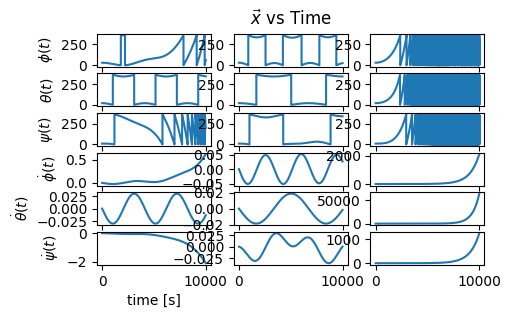

In [6]:
fig,axes = plt.subplots(6,3,sharex=True,figsize=(5,3))
axes[0,1].set_title(r"$\vec{x}$ vs Time")
for i in range(6):
    for j,x in enumerate([x1,x2,x3]):
        if i < 3:
            axes[i,j].plot(times,x[i]%360)
        else:
            axes[i,j].plot(times,x[i])

axes[0,0].set_ylabel(r"$\phi(t)$")
axes[1,0].set_ylabel(r"$\theta(t)$")
axes[2,0].set_ylabel(r"$\psi(t)$")
axes[3,0].set_ylabel(r"$\dot{\phi}(t)$")
axes[4,0].set_ylabel(r"$\dot{\theta}(t)$")
axes[5,0].set_ylabel(r"$\dot{\psi}(t)$")
axes[5,0].set_xlabel("time [s]")
plt.show()